<a href="https://colab.research.google.com/github/nathamon24/image-processing/blob/main/Activity/Activity%234/Lab4_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import img_to_array
from numpy import expand_dims
from scipy import signal

## **Step1 : Image reshape from 3D image (H, W, Ch) -> 4D image (1, H, W, Ch)**

In [31]:
original_img = cv2.imread("/content/img1.JPG")
original_rgb_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
#Image resize (H, W) -> (224, 224
resized_img = cv2.resize(original_rgb_img, (224, 224))
img_array = img_to_array(resized_img)
img_4d = expand_dims(img_array, axis=0)
print(img_4d.shape)

(1, 224, 224, 3)


## **Step3 : Image subtract dataset mean of R, G, B**

In [32]:
img_mean = [np.mean(img_4d[:,:,0]), np.mean(img_4d[:,:,1]), np.mean(img_4d[:,:,2])]
img = np.copy(resized_img).astype(np.float)
img[:,:,0] -= img_mean[0]
img[:,:,1] -= img_mean[1]
img[:,:,2] -= img_mean[2]

## **Step4 :  Color conversion**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


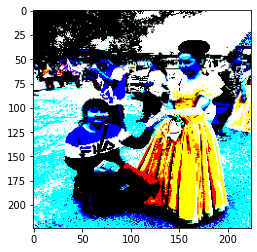

In [33]:
imgBGR = img[:, :, [2,1,0]] #RGB to BGR
plt.imshow(imgBGR)

# **Lab4.3**

## **Step1-2 : Operate 2D convolution to image from 4.2 (imgBGR) & Sum image convolutional results of B,G,R**

In [67]:
model = VGG16()
kernels, biases = model.layers[1].get_weights()
Img_result = np.copy(imgBGR).astype(np.uint8)
# image convolution with kernel แยกแต่ละ color channel (ทำ ทุก color channel)
for i in range(3):
  Img_result[: , :, i] = signal.convolve2d( imgBGR[ : , : , i], kernels[: , : , 0, i] , mode='same',boundary='fill', fillvalue=0)

## **Step3 : Activation Function**

In [68]:
#if val in Image_sum <0 then val = 0
def relu(val):
  if val<0: return 0
  else : return val

height,width,chanel = Img_result.shape
for h in range(height):
  for w in range(width):
    for c in range(chanel):
      relu(Img_result[h][w][c])

## **Step4 : Display images of feature_maps**

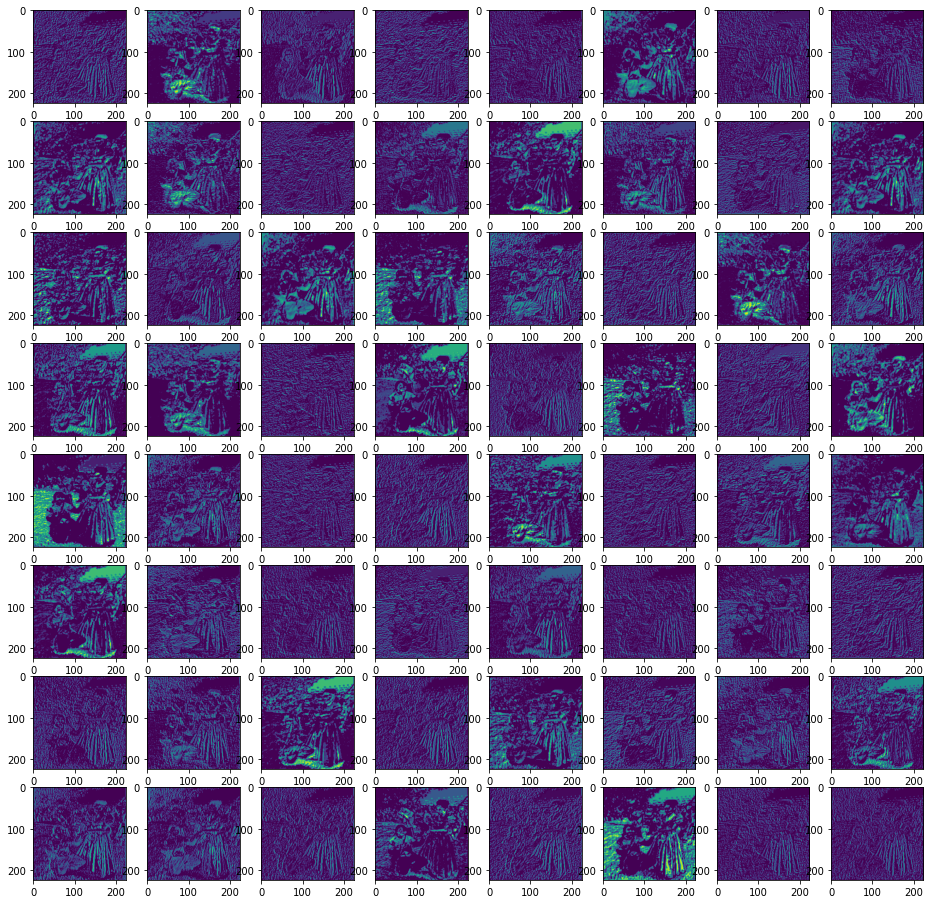

In [69]:
img2 = cv2.resize(Img_result, (224, 224))
img2 = img_to_array(img2)
img2 = expand_dims(img2, axis=0)
img_ready = preprocess_input(img2)
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
feature_maps = model.predict(img_ready)

fig, ax = plt.subplots(8, 8, figsize=(16,16))
index =1 
for row in range(8):
 for col in range(8):
    ax[row, col].imshow(feature_maps[0, :, :, index-1])
    index+=1